In [1]:
import matplotlib.pyplot as plt
import matplotlib
import iminuit
import pandas as pd
matplotlib.rcParams.update({
    "text.usetex": True})
import numpy as np
# import pandas as pd
import mplhep as hep
hep.style.use("CMS") 

from IPython.display import Image
from iminuit import cost
from argparse import Namespace

In [2]:
#CONFIGURATIONS
TUNE='CUETP8M'
MAP_DICT_AK4 = { 
    #AK4 JETS
    'd01-x01-y01' : {'y_range':(0,0.5), 
                                'n_bins': 22,
                                'ylabel':'AK4 $0<|y|<0.5$',
                                'color':'tab:orange',
                                'xfitter_file':'NP_y0.dat'},

 'd02-x01-y01' :  {'y_range':(0.5,1), 
                                'n_bins': 21,
                                'ylabel':'AK4 $0.5<|y|<1.0$',
                                'color':'navy',
                                'xfitter_file':'NP_y1.dat'},

  'd03-x01-y01':  {'y_range':(1,1.5), 
                                'n_bins': 19,
                                'ylabel': 'AK4 $1.0<|y|<1.5$',
                                'color':'tab:green',
                                'xfitter_file':'NP_y2.dat'},

   'd04-x01-y01': {'y_range':(1.5,2), 
                                'n_bins': 16, #15 for ordinary, 16 for RAW
                                'ylabel': 'AK4 $1.5<|y|<2.0$',
                                'color':'tab:red',
                                'xfitter_file':'NP_y3.dat'}
}
MAP_DICT_AK7 = {

   #AK 7
    'd21-x01-y01': {'y_range':(0,0.5), 
                                'n_bins': 22,
                                'ylabel':'AK7 $0<|y|<0.5$',
                                'color':'tab:orange',
                                'xfitter_file':'NP_y0.dat'},
    
    'd22-x01-y01': {'y_range':(0.5,1), 
                                'n_bins': 21,
                                'ylabel':'AK7 $0.5<|y|<1.0$',
                                'color':'navy',
                                'xfitter_file':'NP_y1.dat'
                                },

    'd23-x01-y01': {'y_range':(1,1.5), 
                                'n_bins': 19,
                                'ylabel': 'AK7 $1.0<|y|<1.5$',
                                'color':'tab:green',
                                 'xfitter_file':'NP_y2.dat'},

    'd24-x01-y01': {'y_range':(1.5,2), 
                                'n_bins': 16, #15 for ordinary, 16 for RAW
                                'ylabel': 'AK7 $1.5<|y|<2.0$',
                                'color':'tab:red',
                                'xfitter_file':'NP_y3.dat'}

}
MAP_DICT = { 
    #AK4 JETS
    'd01-x01-y01' : {'y_range':(0,0.5), 
                                'n_bins': 22,
                                'ylabel':'AK4 $0<|y|<0.5$'},

 'd02-x01-y01' :  {'y_range':(0.5,1), 
                                'n_bins': 21,
                                'ylabel':'AK4 $0.5<|y|<1.0$'},

  'd03-x01-y01':  {'y_range':(1,1.5), 
                                'n_bins': 19,
                                'ylabel': 'AK4 $1.0<|y|<1.5$'},

   'd04-x01-y01': {'y_range':(1.5,2), 
                                'n_bins': 16, #15 for ordinary, 16 for RAW
                                'ylabel': 'AK4 $1.5<|y|<2.0$'},
   #AK 7
    'd21-x01-y01': {'y_range':(0,0.5), 
                                'n_bins': 22,
                                'ylabel':'AK7 $0<|y|<0.5$'},
    
    'd22-x01-y01': {'y_range':(0.5,1), 
                                'n_bins': 21,
                                'ylabel':'AK7 $0.5<|y|<1.0$'},

    'd23-x01-y01': {'y_range':(1,1.5), 
                                'n_bins': 19,
                                'ylabel': 'AK7 $1.0<|y|<1.5$'},

    'd24-x01-y01': {'y_range':(1.5,2), 
                                'n_bins': 16, #15 for ordinary, 16 for RAW
                                'ylabel': 'AK7 $1.5<|y|<2.0$'}
}
# def Merge(dict1, dict2):
#     return(dict2.update(dict1))
# MAP_DICT=Merrge()
begin_file_string = 'CMS_2021_I1972986_'
DIR='/home/ali/Desktop/Pulled_Github_Repositories/NPCorrection_InclusiveJets/rivet+pythia/PYTHIA_STANDALONE/Paris_CUETP8M_10T'


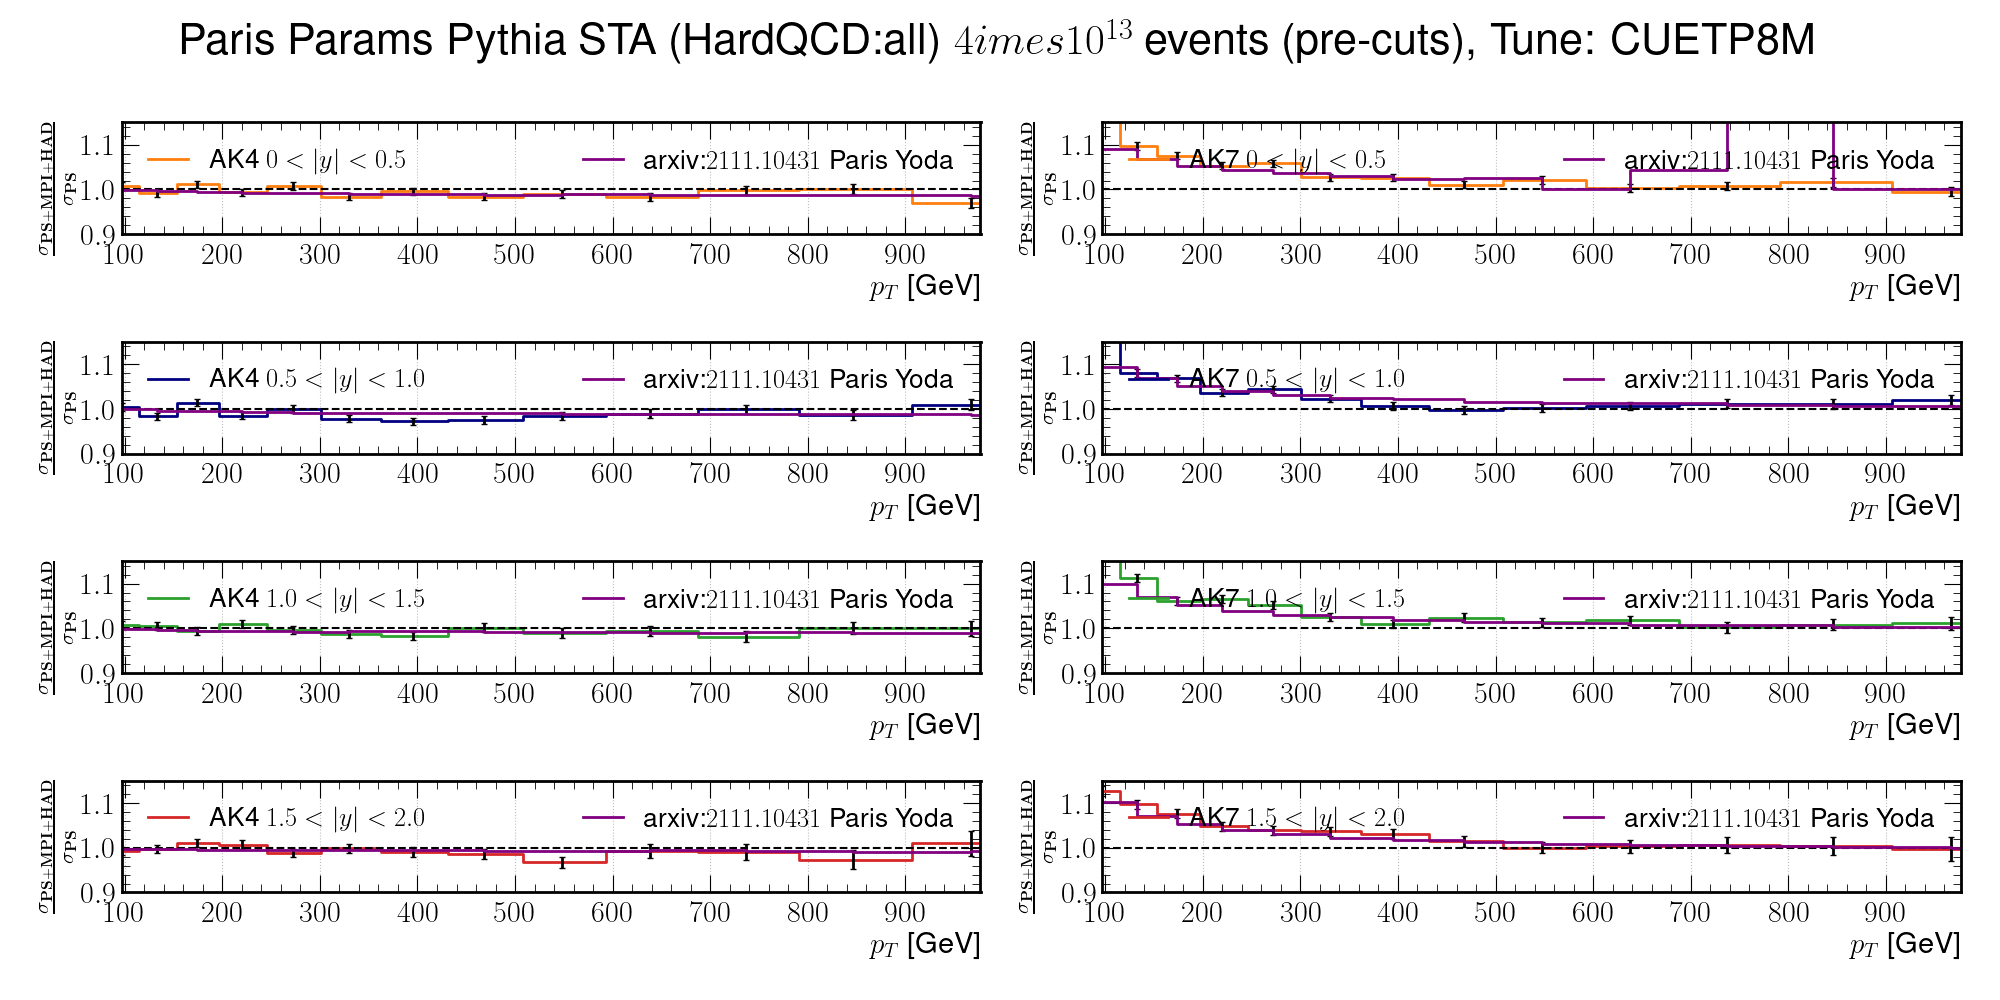

In [4]:
Image(DIR+'/ALLBINS_Paris_Params_HardQCD_Paris_CUETP8M_10T_PYTHIA_STANDALONE_CUETP8M.png', height=600,width=1200
)

It's interesting to note that 
* the NP corrections are considerable for AK7 but pretty much negligible (or actually slightly less than 1) for AK4, so there must be a cone size (say 0.5) in which NPs are completely negligible
* The fact that the corrections low $p_T$ for AK7 are > 1 implies that the spectrum is steeps for post-hadronization than pre-hadronization. If you have a steeply falling spectrum, there is higher probability for events to migrate from low to higher pT than for events to migrate from high pT to lower pT; therefore the spectrum should soften.
* MPI cause there to be more low-$P_T$ jets than if there were no MPI. 
* Combining the two points above, i.e. that hadronization is like a smearing effect that softens the spectrum and MPI causing low-pT jets, then $\frac{\sigma_{PS+HAD}}{\sigma_{PS}}$ for AK7 should look like the one for AK4.

It is not surprising that the corrections are different for AK4 than for AK7 (for AK7 they're about 5X larger), because:
* The larger the cone size, the fewer the number of jets, because the jets will take more particles so there will be fewer particles left over to create jets.
* A jet is always defined to have a $p_T^{jet}$ threshold, where $p_T^{jet} = \sum_{i} p_T^{parton}$ is the sum over the constinuents of the jets. It is more likely for an AK7 jet to pass the threshold than an AK4, since it has more partons.


We want to choose a curve that goes to 1 at high pt. The precision is highest at low pT, as indicated by:


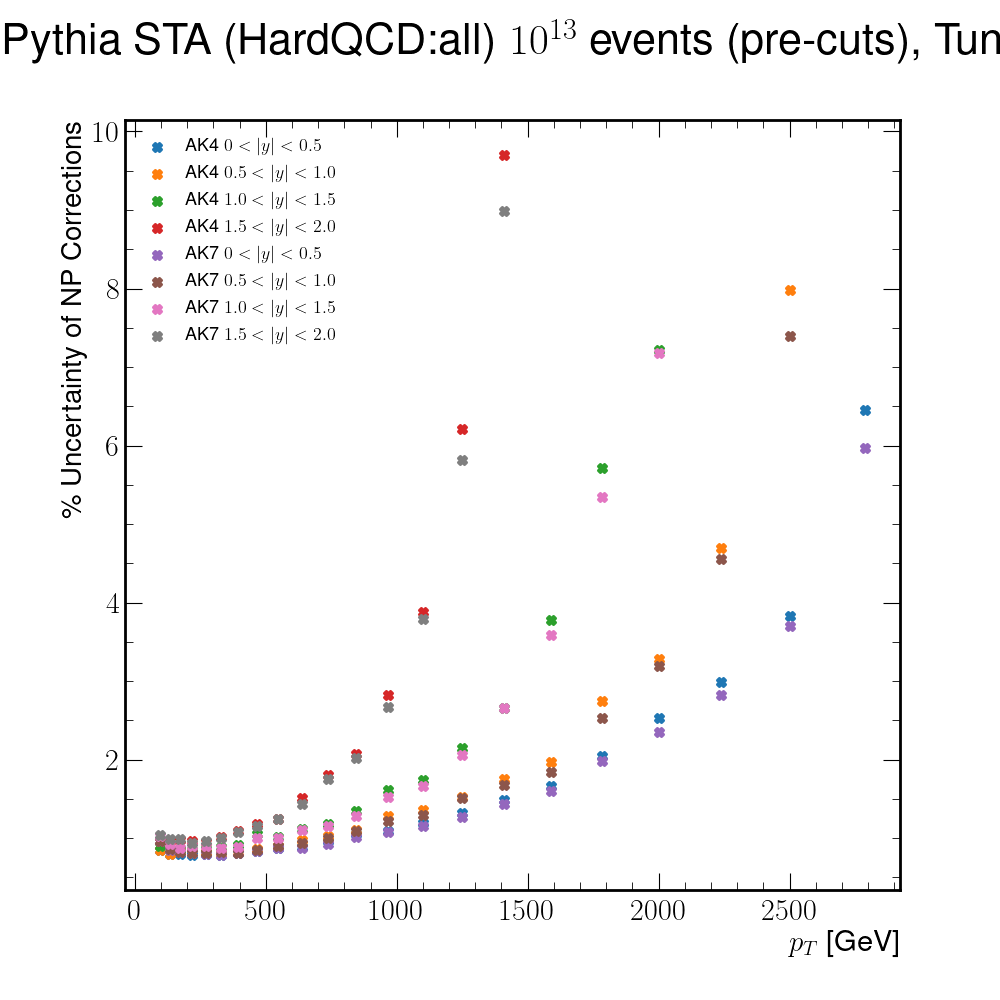

In [6]:
Image(DIR+'/errs_allbins.png',height=400,width=400)

Therefore the accuracy is best at low $p_T$ and hence the function that we fit will be anchored by the values at low $p_T$. Therefore, we can fit the whole $p_T$ range, i.e. go as hig as we want in $p_T$.
For example, if we use $\chi^2$ as the goodness of fit (cost func) then it will be dominated by the values at low $p_T$

The function they choose in [the previous measurement](https://arxiv.org/pdf/2111.10431.pdf) is

$f \left( p_T; \vec{\theta} \right) = a_0 + \frac{a_1}{p_T^{a_2}}$

Currently, we are taking the NP corrections as a ratio of counts. Let's think of one $p_T$ bin, say the bin $i$ where $p_T \in [97, 133]$ GeV. Then the NP Correction in bin $i$ is
<font size="4">
$NPC^i = \frac{\sigma_{PS+MPI+HAD}^i}{\sigma_{PS}^i} \approx \frac{N_{PS+MPI+HAD}^i}{N_PS^i} = \frac{N_{\alpha,i}}{N_{\beta,i} }$,

where the last equality was just a renaming for convenience. However, since the data is composed of poisson-distributed counts in the numerator and denomenator in bin $i$, i.e.
<font size="4">
$$\sigma_{PS+MPI+HAD}^i = \frac{e^{-\alpha_i} \alpha_i^{N_{\alpha,i}} }{N_{\alpha,i} !} $$
$$\sigma_{PS}^i = \frac{e^{-\beta_i} \beta_i^{N_{\beta,i}} }{N_{\beta,i} !} $$;

And hence the likelihood is 
<font size="6">
$$ L = \frac{e^{-\alpha_i} \alpha_i^{N_{\alpha,i}} }{N_{\alpha,i} !} \frac{e^{-\beta_i} \beta_i^{N_{\beta,i}} }{N_{\beta,i} !}  $$

Where $\alpha_i$ and $\beta_i$ are the mean counts in bin $i$ in the numerator and denominator, respectively. What we really want to estimate is the mean count of the ratio in bin $i$: $r_i = \frac{\alpha_i}{\beta_i}$. We can rewrite the likelihood in terms of this parameter by $\alpha_i = r_i \beta_i$
<font size="6">
$$ L = \frac{e^{-r_i \beta_i} (r_i \beta_i)^{N_{\alpha,i}} }{N_{\alpha,i} !} \frac{e^{-\beta_i} \beta_i^{N_{\beta,i}} }{N_{\beta,i} !} $$

    
Where now $r_i$ is the parameter of interest and $\beta_I$ is a nuissance parameter. We can profile the likelihood over the nuissance parameter and get $L (r_i, \hat{\beta_i} )$
Doing a fit over the whole range (naive)

</font>


# Lets do a $\chi^2$ (naive) fit in the first AK4 rapidity bin over the first 4 pt bins

calculate $\chi^2$ (for now with uncertainies equal to 1) and $\nu$

<font size="4">
$\chi^2 = \sum_{i=1}^N \frac{(y_i - f(x_i) )^2 }{\delta_{y_i}^2} =  \sum_{i=1}^N \frac{(y_i - f(x_i) )^2 }{y_i} $

<\font>
Where $x_i$ is the histogram bin minpoints (of the ratio), $y_i$ are the values, $\delta_{y_i}$ are the uncertainties. And since this is just count data, $\delta_{y_i} = \sqrt{y_i}$ which leads to the last equality.

$\nu = N - N_f$ 

Where $N$ is the number of bins and $N_f=3$ is the number of parameters in our model 

In [66]:
df_4 = pd.read_csv(DIR+'/df_4.csv')
df_4.head()

,Unnamed: 0,d01-x01-y01_bins_low,d01-x01-y01NPC_4,d01-x01-y01error_NPC_4,d02-x01-y01_bins_low,d02-x01-y01NPC_4,d02-x01-y01error_NPC_4,d03-x01-y01_bins_low,d03-x01-y01NPC_4,d03-x01-y01error_NPC_4,d04-x01-y01_bins_low,d04-x01-y01NPC_4,d04-x01-y01error_NPC_4
0,0,97.0,1.007992,0.008431,97.0,1.004794,0.008507,97.0,1.007482,0.008991,97.0,0.992523,0.009619
1,1,133.0,0.991066,0.007937,133.0,0.983053,0.008019,133.0,1.005118,0.008602,133.0,0.997409,0.009662
2,2,174.0,1.011345,0.007961,174.0,1.014169,0.008308,174.0,0.994026,0.008656,174.0,1.010507,0.009809
3,3,220.0,0.993441,0.007850,220.0,0.984638,0.008042,220.0,1.009434,0.008939,220.0,1.006905,0.009657
4,4,272.0,1.007720,0.007983,272.0,0.999837,0.008233,272.0,0.995999,0.008639,272.0,0.988323,0.009543


In [73]:
df_4['d03-x01-y01NPC_4']

0     1.007482
1     1.005118
2     0.994026
3     1.009434
4     0.995999
5     0.988163
6     0.983318
7     1.001664
8     0.989523
9     0.993910
10    0.981255
11    1.001711
12    1.000073
13    0.973836
14    0.991918
15    0.976647
16    1.047404
17    1.036294
18    0.966999
Name: d03-x01-y01NPC_4, dtype: float64

In [76]:
def get_NPC(ybin, R):
    if R==0.4:
        df = pd.read_csv(DIR+'/df_4.csv')
        nbins=MAP_DICT_AK4[ybin]['n_bins']
        edges = df[ybin + '_bins_low']
        edges=edges[:nbins]
        NPC = df[ybin +'NPC_4']
        NPC = NPC[:nbins]
        error_NPC = df_4[ybin+'error_NPC_4']
        error_NPC=error_NPC[:nbins]
    elif R==0.7:
        df = pd.read_csv(DIR+'/df_7.csv')
    return edges, NPC, error_NPC



<ErrorbarContainer object of 3 artists>

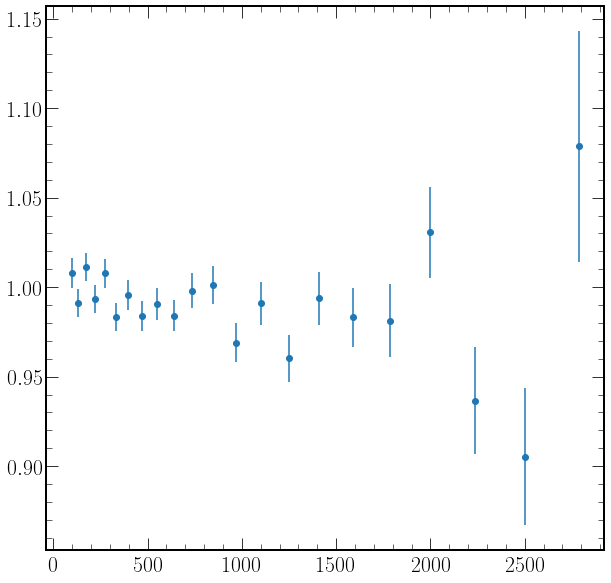

In [77]:
ybin = 'd01-x01-y01'
edges0, NPC0, error_NPC0 = get_NPC(ybin, 0.4)
plt.errorbar(edges0, NPC0, error_NPC0, fmt='o')

In [68]:

def model(
           x,
          a0, a1, a2 
          # pars
         ):
    # a0, a1, a2  = pars
    return a0 + a1/(x**a2)

# def chi2(
#     x, 
#     #y, 
#     # a0, a1, a2 
#          pars
#         ):
#     # a0, a1, a2  = pars
#     # f = model(x, a0, a1, a2)
#     f = model(x, pars)
#     return np.sum(((y-f)**2)/y)
#the cost function is chi2 not negative log-likelihood
# chi2.errordef = iminuit.Minuit.LEAST_SQUARES
# initial_guess = [1.,1.,1.]


In [69]:
from iminuit import Minuit, cost

lsq = cost.LeastSquares(x, y, error_NPC0, model)
m = Minuit(lsq, a0=0, a1=0, a2=0)

In [70]:
m.migrad()

/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in power
  import sys


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 31.24 (chi2/ndof = 1.6)    │              Nfcn = 103              │
│ EDM = 2.29e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a0   │   0.523   │   0.031   │            │            │         │         │       │
│ 1 │ a1   │   0.524   │   0.032   │            │            │         │         │       │
│ 2 │ a2   │   0.018   │   0.006   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────┐
│    │        a0        a1        a2 │
├────┼───────────────────────────────┤
│ a0 │  0.000949 -0.000839  6.99e-05 │
│ a1 │ -0.000839  0.000999  1.89e-05 │
│ a2 │  6.99e-05  1.89e-05  3.11e-05 │
└────┴───────────────────────────────┘

In [115]:
RANGE=(0.9,1.15)
names=['$a_0$', '$a_1$', '$a_2$']  

from matplotlib.legend import Legend

def plot_fits():
    fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(25,25))
    for hist_ind_4, hist_4 in enumerate(MAP_DICT_AK4.keys()):
        def model(x, a0, a1, a2):
            return a0 + a1/(x**a2)
        x4, y4, yerr4 = get_NPC(hist_4, 0.4)
        
        lsq = cost.LeastSquares(x4, y4, yerr4, model)
        m = Minuit(lsq, a0=1, a1=1, a2=1)
        m.migrad()
        ndof= m.ndof#=nu
        chi2min=m.fval
        axs[hist_ind_4,0].errorbar(x4, y4, yerr4,label='Data')
        axs[hist_ind_4,0].plot(x4, model(x4, *m.values[:]),label='Model')
        #add another legend manually
        # data_model=[data,model]
        # leg1 = Legend(parent=axs[hist_ind_4,0], handles=data_model, labels=['data','model'],loc='upper left',frameon=False)
        # axs[hist_ind_4,0].add_artist(leg1)
        
        axs[hist_ind_4,0].set_xlim((0,max(x4) +10))
        axs[hist_ind_4,0].set_ylim(RANGE)
        axs[hist_ind_4,0].set_title(MAP_DICT_AK4[hist_4]['ylabel'])
        # axs[hist_ind_4,0].legend(loc='upper left')
        titles = [f"$\chi^2$/ndof = {chi2min:.3f}/{ndof:.1f}"]
        for i, p in enumerate(m.parameters):
            titles.append(f"{names[i]} = {m.values[p]:.2f} +/- {m.errors[p]:.2f}")


        axs[hist_ind_4,0].legend(title='\n'.join(titles),loc='upper center')
        

/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f5afc4d6ed0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f5afa431790>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/ali/anac

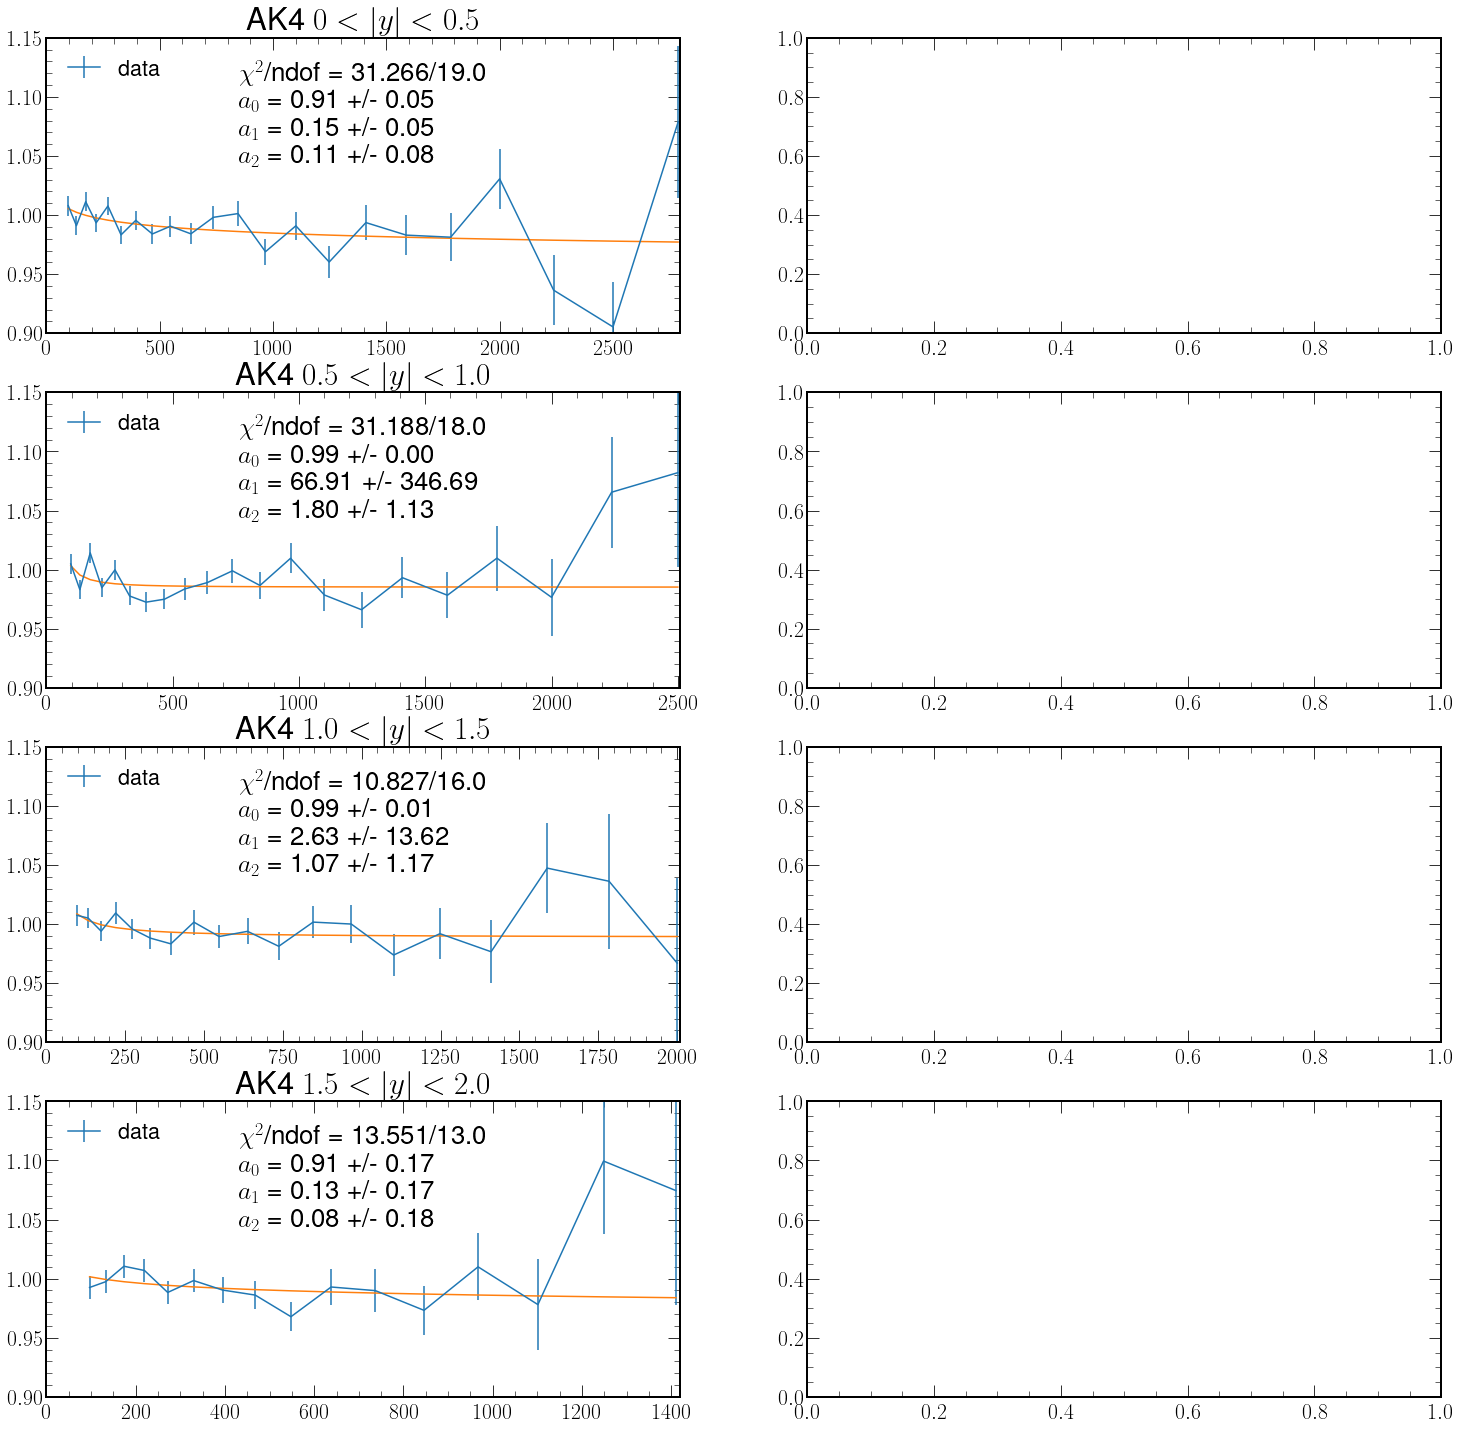

In [116]:
plot_fits()

/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in power
  import sys


(0.9, 1.15)

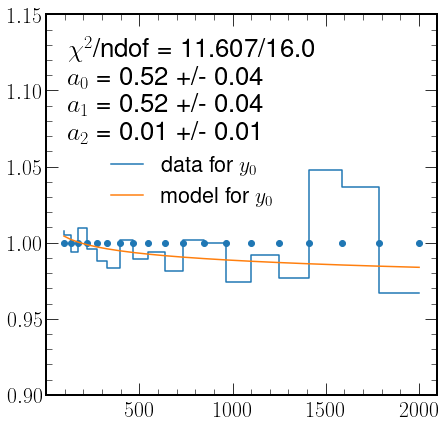

In [78]:
ybin = 'd03-x01-y01'
edges0, NPC0, error_NPC0 = get_NPC(ybin, 0.4)


x=edges0[:19]
y=NPC0[:19]
error_NPC0=error_NPC0[:19]
lsq = cost.LeastSquares(x, y, error_NPC0, model)
m = Minuit(lsq, a0=0, a1=0, a2=0)
m.migrad()

N = len(x)
Nf = 3
nu = N-Nf#=ndof
ndof= m.ndof#=nu
chi2min=m.fval

names=['$a_0$', '$a_1$', '$a_2$']  

plt.figure(figsize=(7,7))
plt.step(x, y, label='data for $y_0$')
plt.plot(x, model(x, *m.values[:]), label='model for $y_0$')
plt.scatter(x, np.ones_like(x))

legend = [f"$\chi^2$/ndof = {chi2min:.3f}/{ndof:.1f}"]
# minuit = result.minuit
names=['$a_0$', '$a_1$', '$a_2$']  
for i, p in enumerate(m.parameters):
    legend.append(f"{names[i]} = {m.values[p]:.2f} +/- {m.errors[p]:.2f}")


plt.legend(title='\n'.join(legend))
plt.ylim((0.9,1.15))

In [12]:
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a0,0.523,0.031,,,,,
1,a1,0.524,0.032,,,,,
2,a2,0.018,0.006,,,,,


In [62]:
m.errors

<ErrorView a0=0.030809945521532774 a1=0.031607647589280266 a2=0.005573098076198639>

### Big imporovement from my errors in the yesterday's notebook fit_1.ipynb !

In [63]:
m.fmin

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 31.24 (chi2/ndof = 1.6)    │              Nfcn = 103              │
│ EDM = 2.29e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘

In [64]:
m.covariance

,a0,a1,a2
a0,0.000949,-0.000839 (-0.862),6.99e-05 (0.407)
a1,-0.000839 (-0.862),0.000999,1.89e-05 (0.107)
a2,6.99e-05 (0.407),1.89e-05 (0.107),3.11e-05


In [65]:
m.minos()

/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 31.24 (chi2/ndof = 1.6)    │             Nfcn = 3100              │
│ EDM = 2.29e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a0   │   0.523   │   0.031   │   -0.031   │   0.031    │         │         │       │
│ 1 │ a1   │   0.524   │   0.032   │   -0.032   │   0.032    │         │         │       │
│ 2 │ a2   │   0.018   │   0.006   │   -0.006   │   0.006    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          a0           │          a1           │          a2           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.031   │   0.031   │  -0.032   │   0.032   │  -0.006   │   0.006   │
│  Valid   │   False   │   False   │   False   │   False   │   False   │   False   │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬───────────────────────────────┐
│    │        a0        a1        a2 │
├────┼───────────────────────────────┤
│ a0 │  0.000949 -0.000839  6.99e-05 │
│ a1 │ -0.000839  0.000999  1.89e-05 │
│ a2 │  6.99e-05  1.89e-05  3.11e-05 │
└────┴───────────────────────────────┘

### Minos and Hesse errors are identical, as we expect, since we are in the asymptotic limit. We usually just use the Hessian errors, they're both approximations and they're both right asymptotically.

/home/ali/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/ali/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/home/ali/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/ali/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/home/ali/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/ali/anaconda3/lib/python

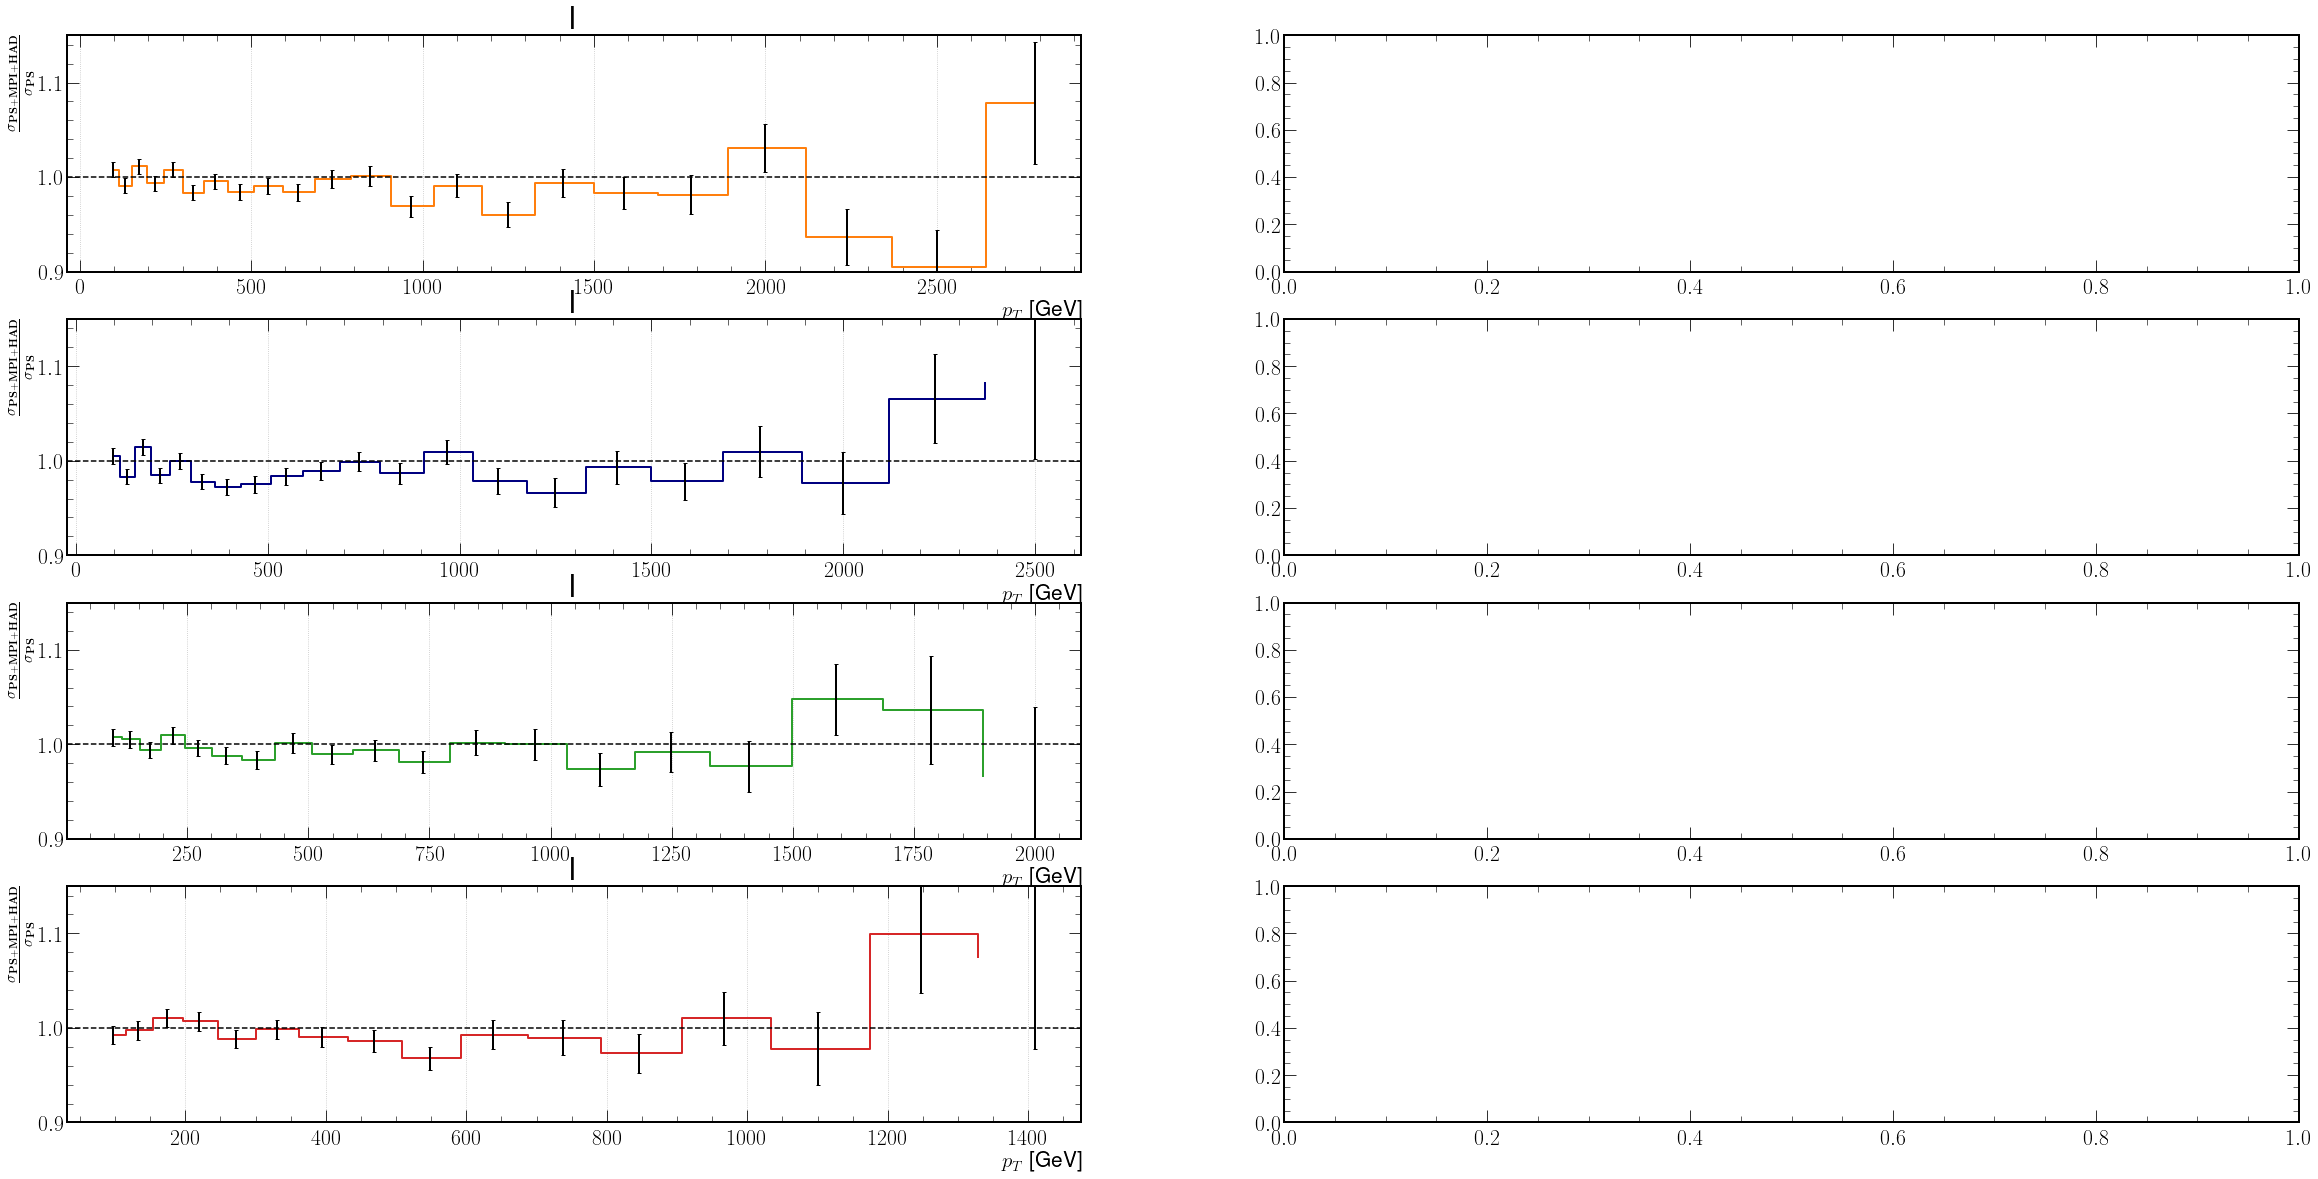

In [71]:
RANGE=(0.9,1.15)
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(40,20))
for hist_ind_4, hist_4 in enumerate(MAP_DICT_AK4.keys()):
    edges, NPC_4, error_NPC_4 = get_NPC(hist_4, 0.4)
    bin_centers = (edges[:-1]+edges[1:])/2
    axs[hist_ind_4,0].step(edges, NPC_4, label=MAP_DICT_AK4[hist_4]['ylabel'], where='mid',linewidth=2, color=MAP_DICT_AK4[hist_4]['color'])
    axs[hist_ind_4, 0].errorbar(edges, NPC_4, yerr = error_NPC_4, fmt='none', c='black', linewidth=2, capsize=2)
    axs[hist_ind_4, 0].set_xlabel('$p_T$ [GeV]', fontsize=21)
    axs[hist_ind_4,0].set_ylabel(r'$\mathbf{\frac{\sigma_{PS+MPI+HAD}}{\sigma_{PS}}}$', fontsize=22)
    axs[hist_ind_4,0].set_title('l')
    axs[hist_ind_4,0].set_ylim(RANGE)
    axs[hist_ind_4,0].axhline(y=1, color='black', linestyle='--')
    axs[hist_ind_4,0].grid(axis='x')
    axs[hist_ind_4,0].set_yticks([0.9,1.0,1.1])
    # axs[hist_ind_4,0].legend(loc='upper center',fontsize=19,mode='expand', ncol=2)
# plt.tight_layout()

Maybe I could fit them all together, i.e. a 3 * 8 parameter model

SyntaxError: invalid syntax (4195171344.py, line 1)